In [34]:
#https://www.kaggle.com/code/vijaypro/cnn-pytorch-96#Defining-the-Model
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
from csvconvert import CSVConvert, LenetTransform, CNNTransform, show_img, AlexNetTransform
from torch.utils.data import DataLoader

#Go to the datasets from the current working directory
for dirname, _, filenames in os.walk(os.getcwd() + '/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/rishishukla/Uni/project-1-python-team_19/backend/models/dataset/american_sign_language.PNG
/Users/rishishukla/Uni/project-1-python-team_19/backend/models/dataset/amer_sign3.png
/Users/rishishukla/Uni/project-1-python-team_19/backend/models/dataset/amer_sign2.png
/Users/rishishukla/Uni/project-1-python-team_19/backend/models/dataset/sign_mnist_train/sign_mnist_train.csv
/Users/rishishukla/Uni/project-1-python-team_19/backend/models/dataset/sign_mnist_test/sign_mnist_test.csv


In [35]:
# Using custom GestureDataset class to load train and test data respectively.

data=CSVConvert(os.getcwd() + "/dataset/sign_mnist_train/sign_mnist_train.csv", transform=LenetTransform())
data_val=CSVConvert(os.getcwd() + "/dataset/sign_mnist_test/sign_mnist_test.csv", transform=LenetTransform())

In [36]:
#Using the in-built DataLoader to create batches of images and labels for training validation respectively. 
BATCH_SIZE=32
train_loader=DataLoader(dataset=data,batch_size=BATCH_SIZE,num_workers=2,shuffle=True)
val_loader=DataLoader(dataset=data_val,batch_size=BATCH_SIZE,num_workers=2,shuffle=True)

In [37]:
len(data), len(data_val)

(27455, 7172)

In [38]:
trainiter = iter(train_loader)
img, label = next(trainiter)
print(img.shape)

torch.Size([32, 1, 32, 32])


tensor(2)


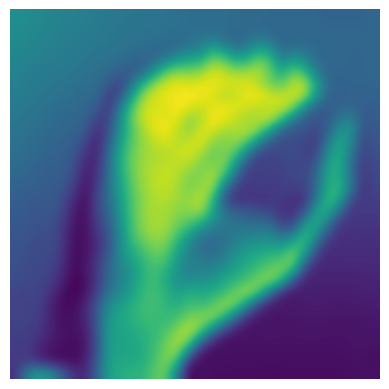

In [39]:
num = 5
show_img(img[num], label[num])

In [41]:
from lenet5 import LeNet5
from cnn_model import CNN_Model
from alexnet_model import AlexNet
from model_functions import trainAndTest
epoch = 10
model = LeNet5()
train_dataloader = train_loader
test_dataloader = val_loader
trainAndTest(model, train_dataloader, test_dataloader, epoch)

Using cpu device
(Training)Epoch [1|10] 
-------------------------------
loss: 3.232742  [   32|27455]
loss: 3.190817  [ 3232|27455]
loss: 3.216877  [ 6432|27455]
loss: 3.204575  [ 9632|27455]
loss: 3.226840  [12832|27455]
loss: 3.196153  [16032|27455]
loss: 3.199513  [19232|27455]
loss: 3.183288  [22432|27455]
loss: 3.171388  [25632|27455]
Done training!
(Testing)
-------------------------------
Test Accuracy: 4.9%
Done Testing!
(Training)Epoch [2|10] 
-------------------------------
loss: 3.162836  [   32|27455]
loss: 3.179666  [ 3232|27455]
loss: 3.142817  [ 6432|27455]
loss: 3.147151  [ 9632|27455]
loss: 3.104382  [12832|27455]
loss: 3.108077  [16032|27455]
loss: 3.139794  [19232|27455]
loss: 3.090765  [22432|27455]
loss: 3.056458  [25632|27455]
Done training!
(Testing)
-------------------------------
Test Accuracy: 6.9%
Done Testing!
(Training)Epoch [3|10] 
-------------------------------
loss: 3.092176  [   32|27455]
loss: 3.067711  [ 3232|27455]
loss: 3.039184  [ 6432|27455]
los

In [42]:
from model_functions import save, load
save(model, "lenet5")

Saved PyTorch Model State to lenet5.pth


In [45]:
lenet = load("lenet5", None)

Fact: 6, Prediction: 16, Accuracy: 22.320247650146484
tensor(6)


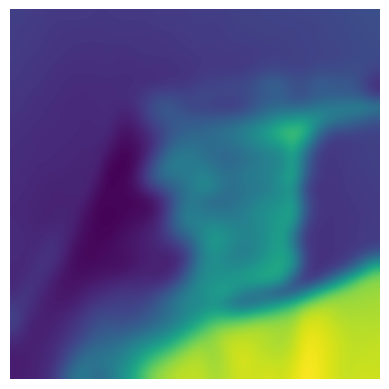

In [75]:
testiter = iter(test_dataloader)
img, label = next(testiter)
idx = 29
pred = lenet(img)
probs= torch.softmax(pred, dim=1)
conf, classes = torch.max(probs, 1)
print(f'Fact: {label[idx]}, Prediction: {(torch.argmax(pred[idx], dim=0))}, Accuracy: {conf[idx] * 100}')
show_img(img[idx], label[idx])